In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.isna().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [5]:
train.shape

(42000, 785)

In [6]:
number = np.array(train.iloc[0,1:]).reshape(28,28)

In [7]:
number[10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  93, 254, 253, 238, 170,  17,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=int64)

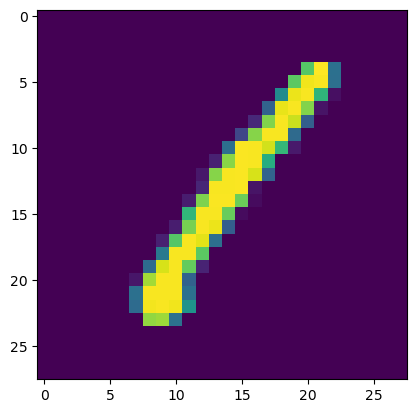

In [8]:
plt.imshow(number)

In [9]:
number4 = np.array(train.iloc[3,1:]).reshape(28,28)

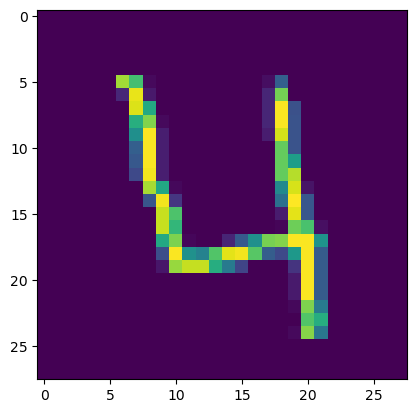

In [10]:
plt.imshow(number4)

In [11]:
arr = train.iloc[3,1:]

(array([691.,   7.,  18.,   4.,   5.,   5.,   7.,  12.,   9.,  26.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

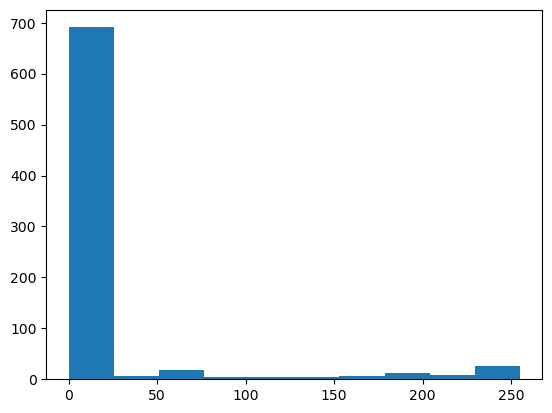

In [12]:
plt.hist(arr)

In [13]:
max(arr)

255

In [14]:
min(arr)

0

In [15]:
np.mean(arr)

19.164540816326532

In [16]:
x = np.array(train)
y = np.array(test)

In [17]:
X_train = x[:,1:]
Y_train = x[:,0]
X_test = y

## Feature engineering

In [18]:
from keras.preprocessing.image import ImageDataGenerator

ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (C:\Users\HP\anaconda3\Lib\site-packages\keras\api\preprocessing\image\__init__.py)

In [22]:
pip install keras

     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     -------- ------------------------------- 10.2/46.2 kB ? eta -:--:--
     ------------------------- ------------ 30.7/46.2 kB 325.1 kB/s eta 0:00:01
     ------------------------- ------------ 30.7/46.2 kB 325.1 kB/s eta 0:00:01
     ------------------------- ------------ 30.7/46.2 kB 325.1 kB/s eta 0:00:01
     ------------------------- ------------ 30.7/46.2 kB 325.1 kB/s eta 0:00:01
     --------------------------------- ---- 41.0/46.2 kB 115.5 kB/s eta 0:00:01
     -------------------------------------- 46.2/46.2 kB 121.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.1 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.1 MB 653.6 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.1 MB 751.6 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.1 MB 751.6 kB/s eta 0:00:02
   

In [19]:
pip install tensorflow


   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/377.0 MB 1.3 MB/s eta 0:04:55
   ---------------------------------------- 0.1/377.0 MB 1.0 MB/s eta 0:06:04
   ---------------------------------------- 0.1/377.0 MB 1.1 MB/s eta 0:05:54
   ---------------------------------------- 0.3/377.0 MB 1.3 MB/s eta 0:04:49
   ---------------------------------------- 0.5/377.0 MB 2.1 MB/s eta 0:03:00
   ---------------------------------------- 0.6/377.0 MB 2.1 MB/s eta 0:02:56
   ---------------------------------------- 0.8/377.0 MB 2.3 MB/s eta 0:02:47
   ---------------------------------------- 1.0/377.0 MB 2.6 MB/s eta 0:02:23
   ---------------------------------------- 1.3/377.0 MB 2.9 MB/s eta 0:02:12
   ---------------------------------------- 1.5/377.0 MB 3.0 MB/s eta 0:02:07
   ---------------------------------------- 1.7/377.0 MB 3.2 MB/s eta 0:01:57
   ---------------------------------------- 1.9/377.0 MB 3.3 MB/s eta 

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
X_train = X_train.reshape(-1,28,28,1)

In [21]:
datagen = ImageDataGenerator(
           rotation_range = 15,
           height_shift_range=0.1,
           zoom_range=0.1,
           shear_range=0.1)
datagen.fit(X_train)

In [22]:
X_train = X_train.reshape(-1,784)
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Model

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train , Y_train)

KNeighborsClassifier()

In [25]:
int(knn.predict(X_test[60].reshape(1,-1)))

C:\Users\HP\AppData\Local\Temp\ipykernel_7232\3513341821.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(knn.predict(X_test[60].reshape(1,-1)))


4

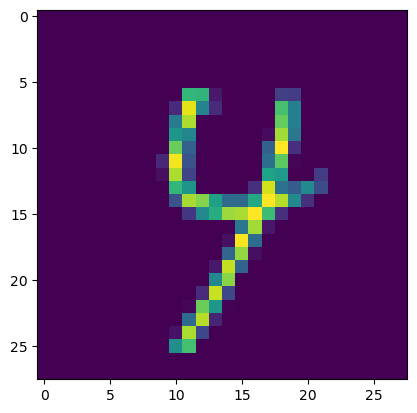

In [26]:
num = np.array(test.iloc[60,:]).reshape(28,28)
plt.imshow(num)